In [447]:
# import module 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import datetime as dt
import seaborn as sns
import os 
import matplotlib.dates as mdates
%matplotlib inline 
import datetime
import scipy.stats as stats

In [448]:
# overview
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://i.imgur.com/HRhd2Y0.png")

# 1. Analysis of the data set

In [449]:
# all csv files are read into a DataFrame 
filepath = [f for f in os.listdir('/Users/iminhas/Desktop/DataScience/Projekt/Projekt/nbs') if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepath))

In [450]:
# output the first 5 lines 
df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,order_id,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,13023.0,campinas,SP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844.0,mogi guacu,SP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031.0,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195.0,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51a04a8a6bdcb23deccc82b0b80742cf,12914.0,braganca paulista,SP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
# Information of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550922 entries, 0 to 32950
Data columns (total 45 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   seller_id                      115745 non-null   object 
 1   seller_zip_code_prefix         3095 non-null     float64
 2   seller_city                    3095 non-null     object 
 3   seller_state                   3095 non-null     object 
 4   product_category_name          32412 non-null    object 
 5   product_category_name_english  71 non-null       object 
 6   order_id                       415201 non-null   object 
 7   customer_id                    198882 non-null   object 
 8   order_status                   99441 non-null    object 
 9   order_purchase_timestamp       99441 non-null    object 
 10  order_approved_at              99281 non-null    object 
 11  order_delivered_carrier_date   97658 non-null    object 
 12  order_delivered_

In [452]:
# checking of missing values
df.isna().sum() 

seller_id                        1435177
seller_zip_code_prefix           1547827
seller_city                      1547827
seller_state                     1547827
product_category_name            1518510
product_category_name_english    1550851
order_id                         1135721
customer_id                      1352040
order_status                     1451481
order_purchase_timestamp         1451481
order_approved_at                1451641
order_delivered_carrier_date     1453264
order_delivered_customer_date    1454446
order_estimated_delivery_date    1451481
order_item_id                    1438272
product_id                       1405321
shipping_limit_date              1438272
price                            1438272
freight_value                    1438272
customer_unique_id               1451481
customer_zip_code_prefix         1451481
customer_city                    1451481
customer_state                   1451481
geolocation_zip_code_prefix       550759
geolocation_lat 

**Individual consideration makes more sense, since missing values can be looked at more closely!**

## 1.1 Customers 
Describes the customer information of this company.

In [453]:
# read customer csv and display first lines
customer = pd.read_csv('olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [454]:
# information of datatyp + missing value 
customer.info()
customer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [455]:
# shape of table
customer.shape

(99441, 5)

In [456]:
# majority representation of customers
count_state_customer = customer['customer_state'].value_counts()
unique_states_customer= customer['customer_state'].unique()
unique_states_customer

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

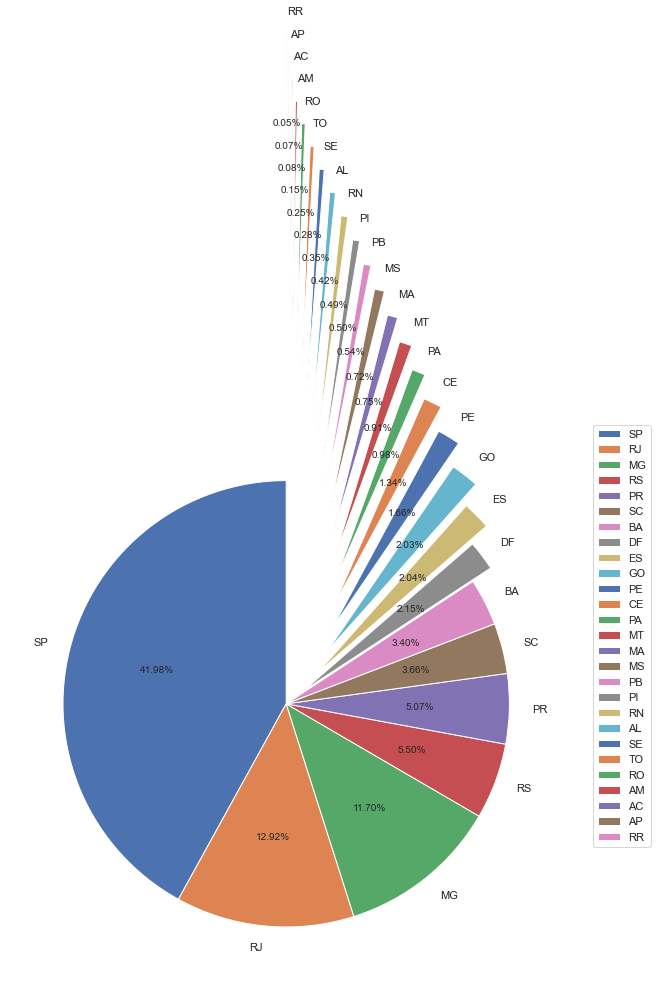

In [457]:
# Graphic representation with pie chart
explode = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1,1.2, 1.3, 1.4,1.5, 1.6, 1.7, 1.8, 1.9, 2]
count_state_customer.plot.pie(figsize=(10,20), startangle=90,explode=explode, autopct='%1.2f%%') 
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('')
plt.show()

Text(0, 0.5, 'No. of Customers')

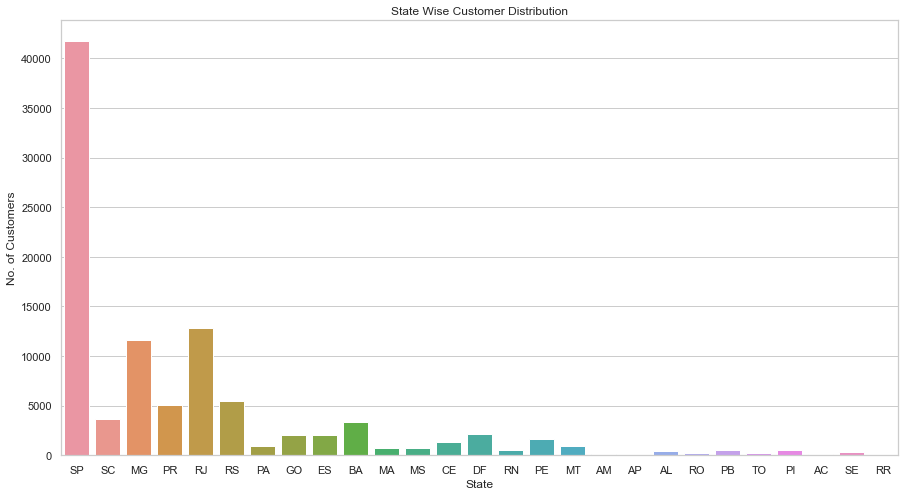

In [458]:
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=customer)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

In [459]:
customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

## 1.2 Sellers
Describes the seller information of this company.

In [460]:
# read data set
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [461]:
# information of datatyp
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [462]:
# checking missing values
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [463]:
# representation of customers 
count_state_sellers = sellers['seller_state'].value_counts()
unique_states_sellers= sellers['seller_state'].unique()
unique_states_sellers

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

In [464]:
# NaN
missing_value = sellers['seller_state'] == 'NaN'
missing_value.isna().any()

False

Text(0, 0.5, '')

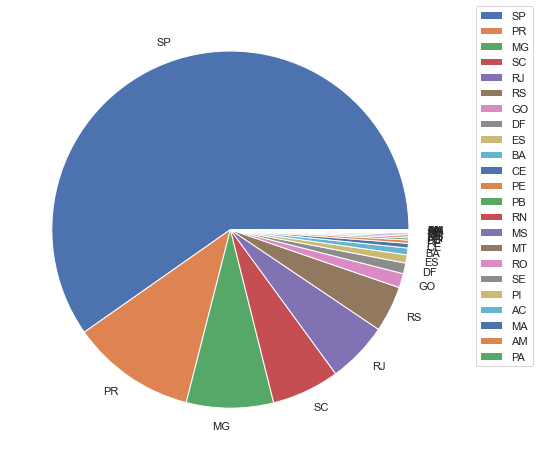

In [465]:
# graphic representation with pie chart
count_state_sellers.plot.pie(figsize=(8, 10))
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('')

## 1.3 Geolocation 
It contains geographic information related to both the sellers and the customers.

In [466]:
# Geolocation read csv 
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

In [467]:
# display first lines of geolocation
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [468]:
# Shape anzeigen 
geolocation.shape

(1000163, 5)

In [469]:
geolocation.columns.unique()

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [470]:
# information of data 
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [471]:
# Finding missing Values
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

## 1.4 Orders 

 - difference_estimated_to_real = Differenz zwischen erwarteter Lieferzeit und tatsächlicher Lieferzeit.

In [472]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [473]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [474]:
orders.shape

(99441, 8)

In [475]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [476]:
#column names
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [477]:
# NaN
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

<AxesSubplot:>

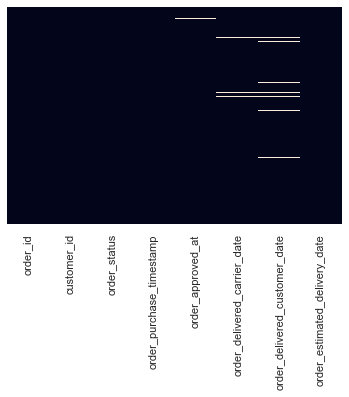

In [478]:
# Missing Values 
sns.heatmap(data=orders.isnull(),yticklabels= False, cbar=False)

In [479]:
# number of missing values
orders.isna()['order_delivered_customer_date'].value_counts()

False    96476
True      2965
Name: order_delivered_customer_date, dtype: int64

In [480]:
## create new feautres for a better understanding of contiguous columns 
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

# create new feautres 
orders['days_order_to_delivery'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['days_order_to_estimates_delivery'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days
orders['time_to_approve_order'] = (orders['order_approved_at'] - orders['order_purchase_timestamp'])
orders['minutes_to_approve_order'] = orders['time_to_approve_order'].astype('timedelta64[m]')
orders['difference_estimated_to_real'] = (orders['days_order_to_estimates_delivery'] - orders['days_order_to_delivery']) 

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0 days 00:10:42,10.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1 days 06:42:50,1842.0,6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0 days 00:16:34,16.0,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0 days 00:17:53,17.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0 days 01:01:50,61.0,10.0


In [481]:
orders['difference_estimated_to_real'].describe()

count    96476.000000
mean        11.280142
std         10.193898
min       -189.000000
25%          7.000000
50%         12.000000
75%         16.000000
max        146.000000
Name: difference_estimated_to_real, dtype: float64

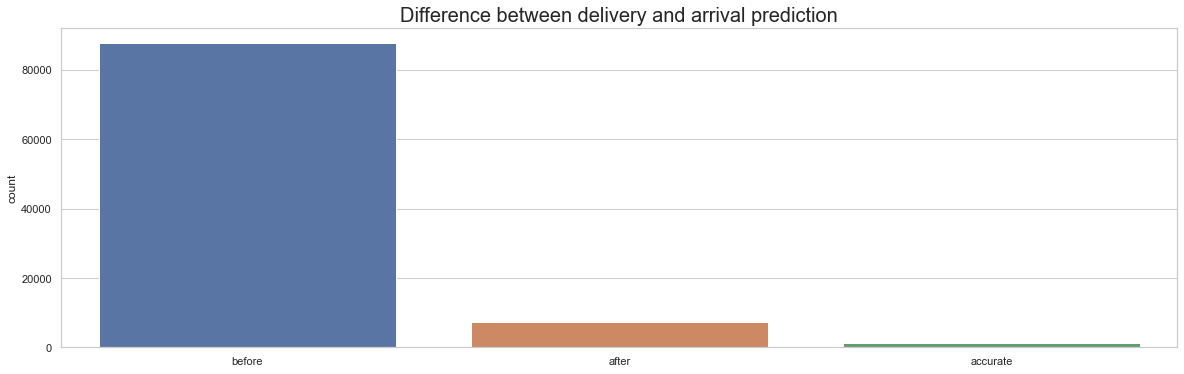

In [482]:
## As you can see most deliveries arrive earlier than predicted
# plot difference between delivery and arrival prediction    
def  group_row_1(value):
    if (value < 0):
        return 'after'
    elif (value == 0):
        return 'accurate'
    elif (value > 0):
        return 'before'
    else:
        return np.NaN  

orders['prediction_accuracy'] = orders['difference_estimated_to_real'].apply(group_row_1)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
sns.countplot(data=orders , x='prediction_accuracy')
plt.title('Difference between delivery and arrival prediction', fontsize =20)
plt.xlabel('')
plt.ylabel('count')

plt.show()

In [483]:
# representation in percent
accurate =(orders['prediction_accuracy']=='accurate').sum()
before = (orders['prediction_accuracy']=='before').sum()
after =(orders['prediction_accuracy']=='after').sum()

summe = accurate + after + before

prozent_accurate = (accurate*100)/ summe
prozent_before = (before*100)/ summe
prozent_after = (after*100)/ summe

print('accurate =',  prozent_accurate,'%')
print('after =',  prozent_before,'%')
print('before =',  prozent_after,'%')

accurate = 1.4304075625025914 %
after = 90.99465151954891 %
before = 7.574940917948505 %


Text(0, 0.5, 'Count')

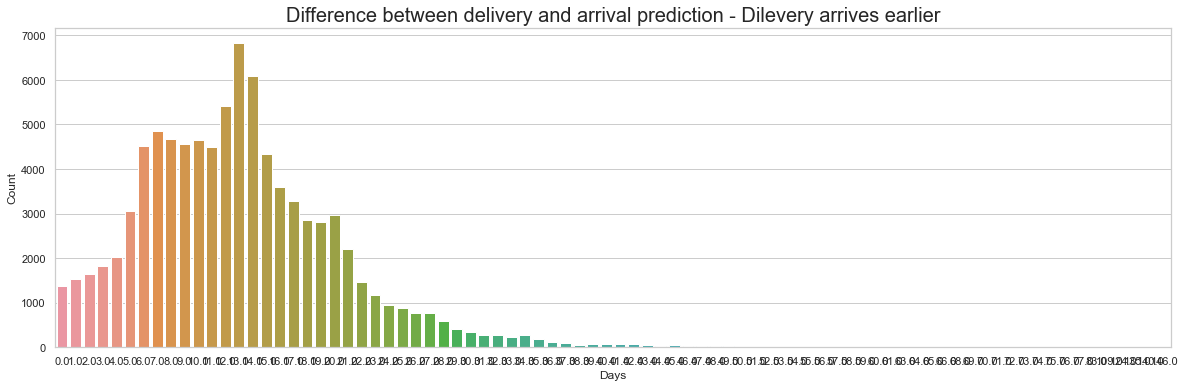

In [484]:
def  group_row_before(value):
    ''' Time in days between delivery and estimated delivery. Dilevery arrives earlier than predicted '''
    if (value >= 0) :
        return int(value)
    else:
        return np.NaN  

orders['group_estimated_difference'] = orders['difference_estimated_to_real'].apply(group_row_before)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
sns.countplot(data=orders , x='group_estimated_difference')
plt.title('Difference between delivery and arrival prediction - Dilevery arrives earlier', fontsize =20)
plt.xlabel('Days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

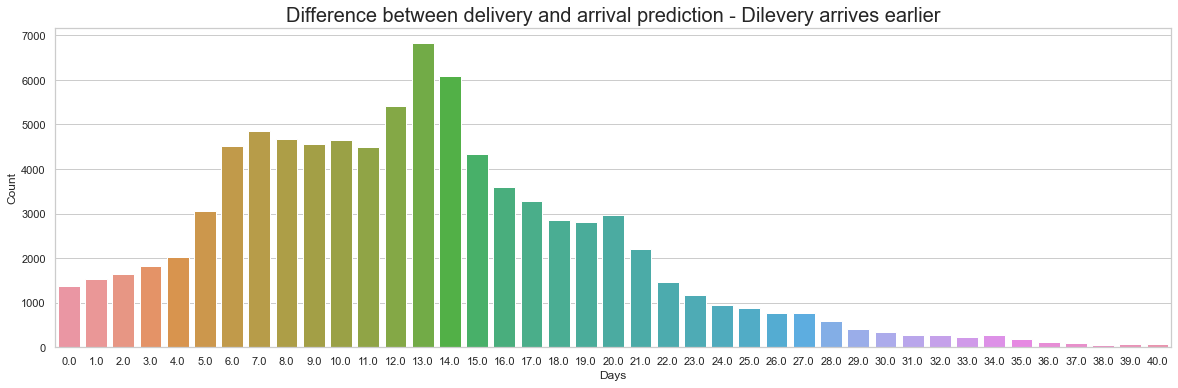

In [485]:

def  group_row_before_to_40Days(value):
    ''' Time in days between delivery and estimated delivery. Dilevery arrives earlier than predicted '''
    ### Alles was unter 1000 ist wird nicht betrachtet
    if (value >= 0) and (value<=40):
        return int(value)
    else:
        return np.NaN  

orders['group_estimated_difference'] = orders['difference_estimated_to_real'].apply(group_row_before_to_40Days)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
sns.countplot(data=orders , x='group_estimated_difference')
plt.title('Difference between delivery and arrival prediction - Dilevery arrives earlier', fontsize =20)
plt.xlabel('Days')
plt.ylabel('Count')

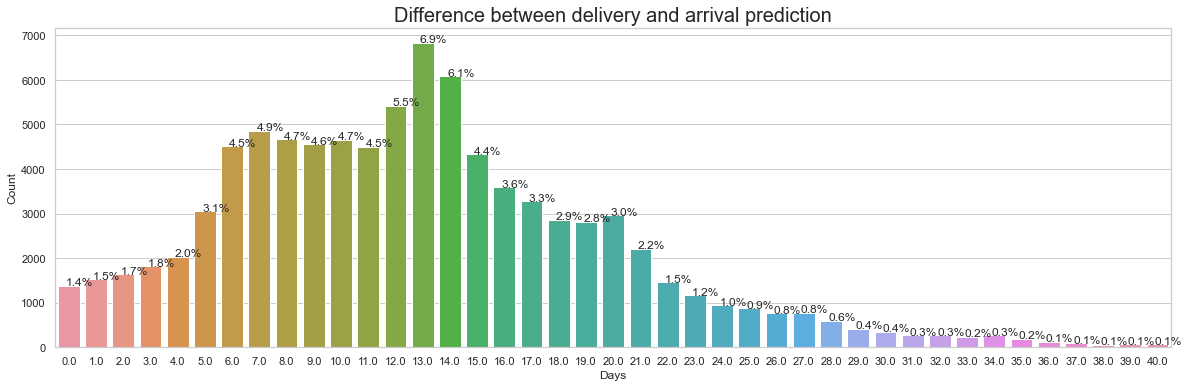

In [486]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
total = float(len(orders))
ax = sns.countplot(x="group_estimated_difference", data=orders)
plt.title('Difference between delivery and arrival prediction', fontsize =20)
plt.xlabel('Days')
plt.ylabel('Count')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

plt.show()


Text(0, 0.5, 'Count')

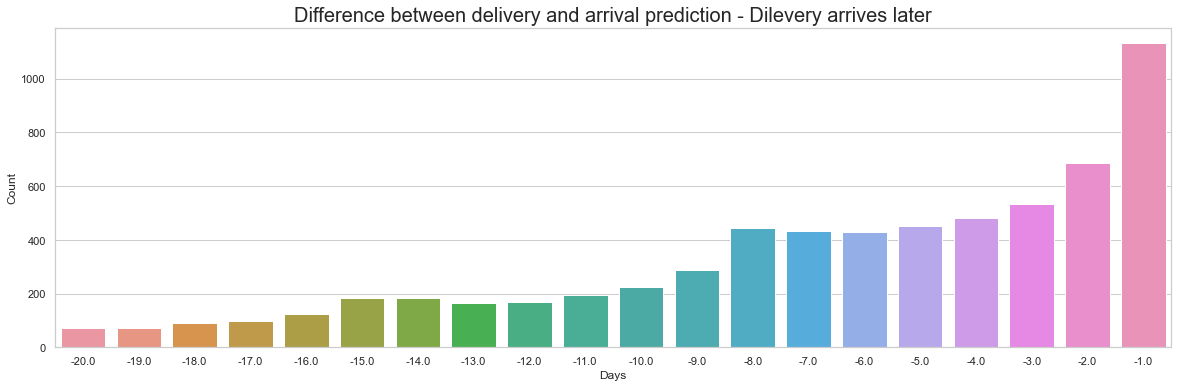

In [487]:
def  group_row_after(value):
    ''' Time in days between delivery and estimated delivery. Dilevery arrives later than predicted'''
    if (value < 0) & (value >=-20):
        return int(value)
    else:
        return np.NaN  

orders['group_estimated_difference'] = orders['difference_estimated_to_real'].apply(group_row_after)

fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
sns.countplot(data=orders , x='group_estimated_difference')
plt.title('Difference between delivery and arrival prediction - Dilevery arrives later', fontsize =20)
plt.xlabel('Days')
plt.ylabel('Count')

Text(0, 0.5, 'Anzahl')

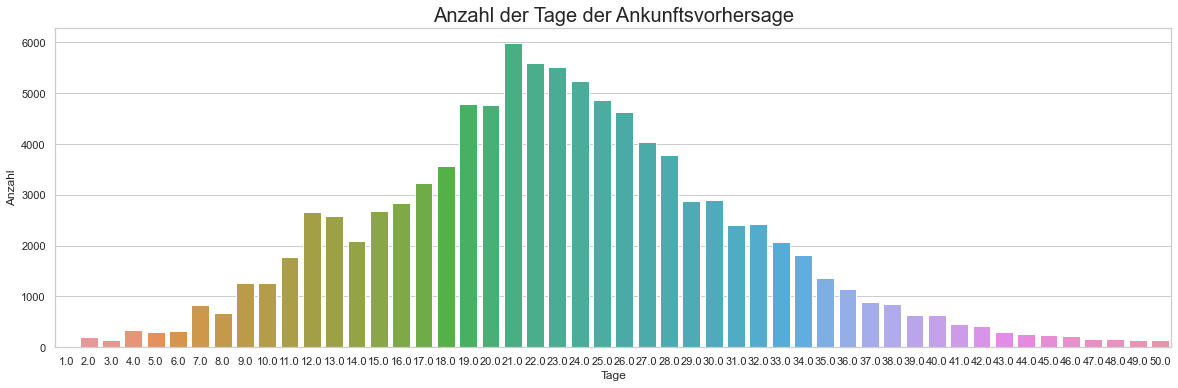

In [488]:
orders['group_estimated_dilivery'] = orders['days_order_to_estimates_delivery'].apply(group_row)


fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
sns.countplot(data=orders , x='group_estimated_dilivery')
plt.title('Anzahl der Tage der Ankunftsvorhersage', fontsize = 20)
plt.xlabel('Tage')
plt.ylabel('Anzahl')

## 1.5 Order reviews 

In [489]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [490]:
order_reviews.shape

(99224, 7)

In [491]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [492]:
# checking missing values
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

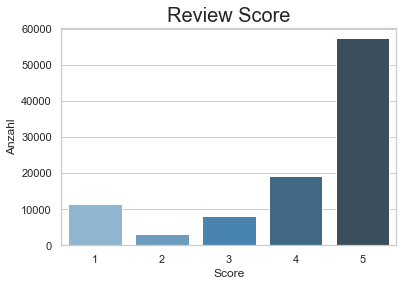

In [493]:
sns.countplot(x="review_score", data=order_reviews, palette='Blues_d')
plt.title('Review Score', fontsize=20)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.show()

## 1.6 Order items 

In [494]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [495]:
order_items.shape

(112650, 7)

In [496]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [497]:
# checking missing values
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [498]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [499]:
# merge two tables 
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')


customers_orders=pd.merge(customer, orders, on= "customer_id")

   Anzahl der Bestellungen  log Prozent der Kunden
0                        1                   93099
1                        2                    2745
2                        3                     203
3                        4                      30
4                        5                       8
5                        6                       6
6                        7                       3
7                       17                       1
8                        9                       1


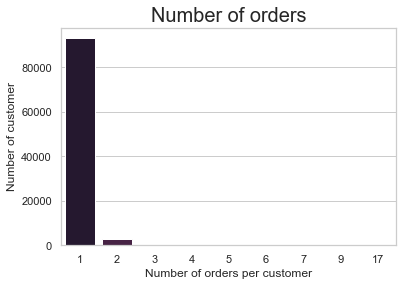

In [500]:
# plot number of orders per customer
num_orders=customers_orders['customer_unique_id'].value_counts().value_counts()
num_orders=num_orders.reset_index()
num_orders.rename(columns={'index':'Anzahl der Bestellungen', 'customer_unique_id':'log Prozent der Kunden'},inplace=True)
sns.barplot(data=num_orders,x='Anzahl der Bestellungen',y='log Prozent der Kunden',palette='rocket')
plt.title('Number of orders per customer')
plt.title('Number of orders', fontsize = 20)
plt.xlabel('Number of orders per customer')
plt.ylabel('Number of customer')
print(num_orders)

   Anzahl der Bestellungen  log Prozent der Kunden
0                        1               93.622349
1                        2                2.760431
2                        3                0.204141
3                        4                0.030169
4                        5                0.008045
5                        6                0.006034
6                        7                0.003017
7                       17                0.001006
8                        9                0.001006


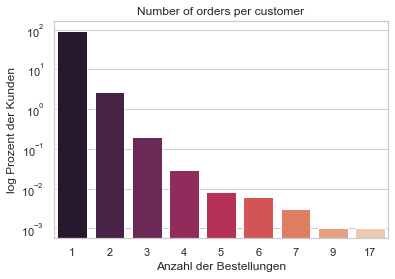

In [501]:
num_orders=customers_orders['customer_unique_id'].value_counts().value_counts()/customers_orders.shape[0]*100
num_orders=num_orders.reset_index()
num_orders.rename(columns={'index':'Anzahl der Bestellungen', 'customer_unique_id':'log Prozent der Kunden'},inplace=True)
sns.barplot(data=num_orders,x='Anzahl der Bestellungen',y='log Prozent der Kunden',palette='rocket')
plt.yscale('log')
plt.title('Number of orders per customer')
print(num_orders)

/Users/iminhas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


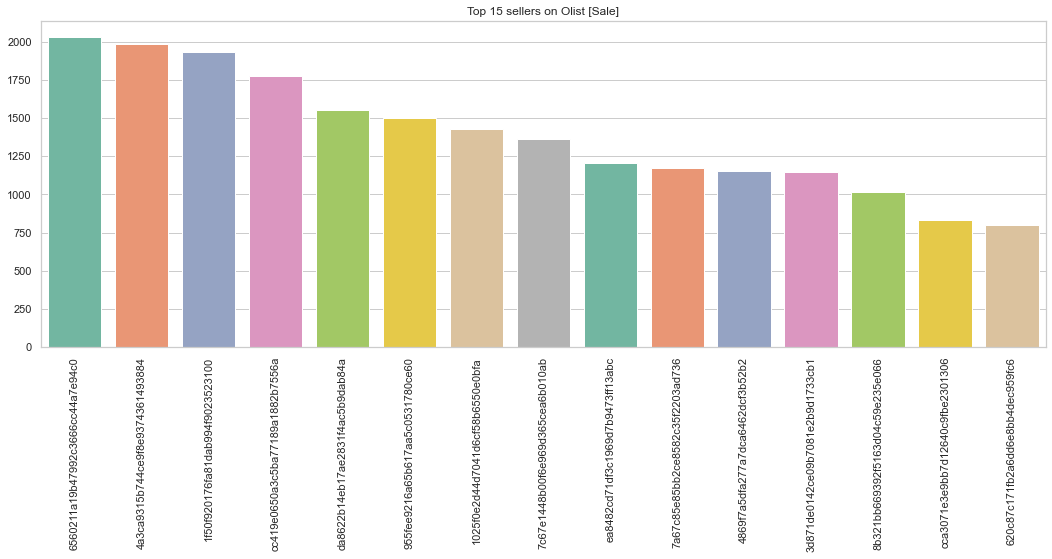

In [502]:
plt.figure(figsize=(18,6))
ax=sns.barplot(order_items['seller_id'].value_counts()[:15].index,order_items['seller_id'].value_counts()[:15].values,palette='Set2')
ax.set_title('Top 15 sellers on Olist [Sale]')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [503]:
best_15_sellers  = dict(order_items['seller_id'].value_counts()[:15]).keys()
best_15_sellers

dict_keys(['6560211a19b47992c3666cc44a7e94c0', '4a3ca9315b744ce9f8e9374361493884', '1f50f920176fa81dab994f9023523100', 'cc419e0650a3c5ba77189a1882b7556a', 'da8622b14eb17ae2831f4ac5b9dab84a', '955fee9216a65b617aa5c0531780ce60', '1025f0e2d44d7041d6cf58b6550e0bfa', '7c67e1448b00f6e969d365cea6b010ab', 'ea8482cd71df3c1969d7b9473ff13abc', '7a67c85e85bb2ce8582c35f2203ad736', '4869f7a5dfa277a7dca6462dcf3b52b2', '3d871de0142ce09b7081e2b9d1733cb1', '8b321bb669392f5163d04c59e235e066', 'cca3071e3e9bb7d12640c9fbe2301306', '620c87c171fb2a6dd6e8bb4dec959fc6'])

In [504]:
orders['month_of_purchase']=pd.DatetimeIndex(orders['order_purchase_timestamp']).month
order_items_categories = pd.merge(order_items,products[["product_category_name","product_id"]],on='product_id')
order_items_categories_month = pd.merge(order_items_categories,orders[["month_of_purchase","order_id"]],on='order_id')
order_items_categories.head()
print(order_items_categories_month.shape)
print(order_items.shape)
print(order_items_categories_month.columns)

(112650, 9)
(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'month_of_purchase'],
      dtype='object')


Text(0, 0.5, 'Umsatz')

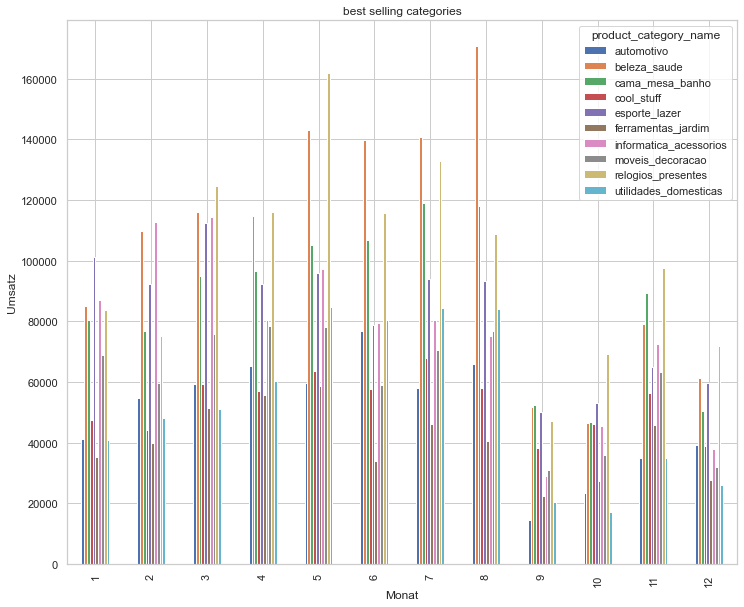

In [505]:
# plot best selling categories
sales_df=order_items_categories.groupby(['product_category_name'])['price'].sum()
best_sellers=sales_df.nlargest(10).index

best_df=order_items_categories_month[order_items_categories_month['product_category_name'].isin(best_sellers)]

best_monthly=best_df.pivot_table(index='month_of_purchase',columns='product_category_name',values='price', aggfunc='sum')
best_monthly.plot(kind='bar',figsize=(12, 10))
plt.title('best selling categories')
plt.xlabel('Monat')
plt.ylabel('Umsatz')

## 1.7 Order payments 

In [506]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')

In [507]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [508]:
order_payments['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [509]:
order_payments.shape 

(103886, 5)

In [510]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<AxesSubplot:>

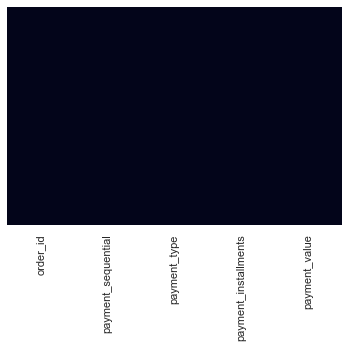

In [511]:
# missing values
sns.heatmap(data=order_payments.isnull(),yticklabels= False, cbar=False)

In [512]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Text(0, 0.5, 'Count')

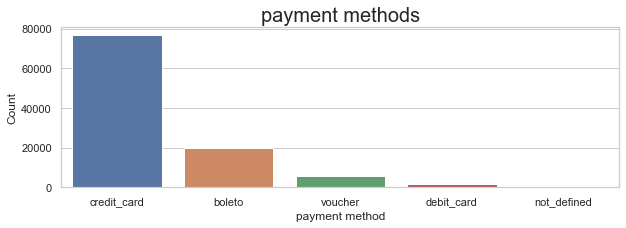

In [513]:
# plot payment methods
fig = plt.figure(figsize=(10,10))
fig.add_subplot(3,1,1)
sns.countplot(data=order_payments , x='payment_type')
# boleto= payment method in brasil 

plt.title('payment methods', fontsize=20)
plt.xlabel('payment method')
plt.ylabel('Count')

In [514]:
# payment methods
order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [515]:
# Payment Sequential
order_payments['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

Text(0, 0.5, 'Count')

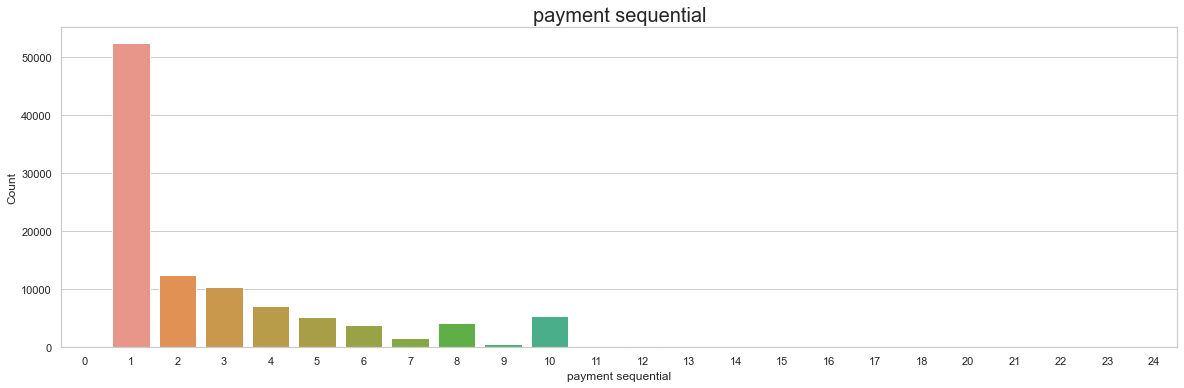

In [516]:
# plot payment sequential
fig = plt.figure(figsize=(20,20))
fig.add_subplot(3,1,1)
sns.countplot(data=order_payments , x='payment_installments')
plt.title('payment sequential', fontsize=20)
plt.xlabel('payment sequential')
plt.ylabel('Count')


In [517]:
order_payments['payment_installments'].value_counts()

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: payment_installments, dtype: int64

Text(0, 0.5, 'number of orders')

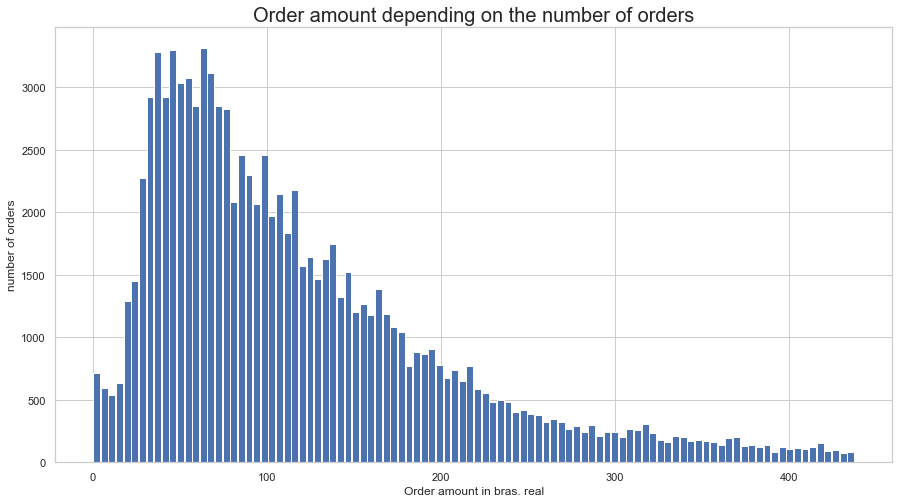

In [518]:
quantile95 = order_payments['payment_value'].quantile(.95)
payments_q95 = order_payments[order_payments['payment_value']<quantile95]

payments_q95.hist(column='payment_value', bins= 100, figsize=(15,8), rwidth = 0.9)
plt.title('Order amount depending on the number of orders', fontsize=20) # Höhe der Transaktion
plt.xlabel('Order amount in bras. real') # Auftragswert oder Höher der ZTransaktion
plt.ylabel('number of orders')

In [519]:
order_payments.duplicated().sum()

0

## 1.8 Products

In [520]:
products = pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [521]:
products.shape

(32951, 9)

In [522]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [523]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

<AxesSubplot:>

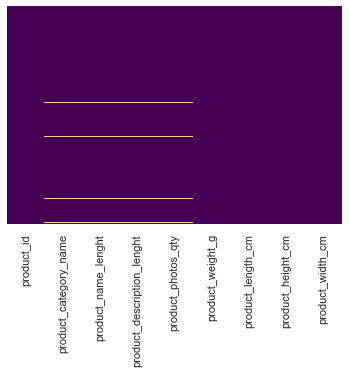

In [524]:
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [525]:
products = pd.read_csv('olist_products_dataset.csv')
product_tr = pd.read_csv('product_category_name_translation.csv')
category_translations = dict(zip(product_tr["product_category_name"], product_tr["product_category_name_english"])) 
# Hier wird eine Dict erstellt mit dem Namen der Kategorie und deren Übersetzung als Key:Value. Dies wird getan, weil die Funktion "replace" eine Dict zum ersetzen benötigt.
products = products.replace({'product_category_name':category_translations})

In [526]:
products['product_category_name'].head(5)

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

# 2. Preprocessing

## 2.1 Data Cleaning

### Fill products NaNs 

Nans Anzahl in product_category_name = 0 


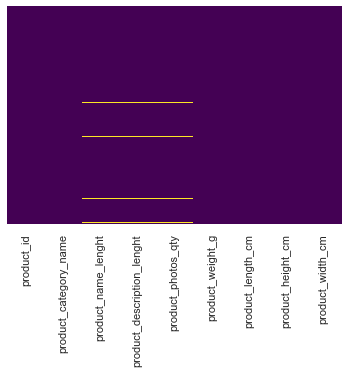

In [527]:
# Fill products NaNs 
products['product_category_name'].fillna(value=products['product_category_name'].mode()[0], inplace=True) # Object
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")
print("Nans Anzahl in product_category_name = %s " % products['product_category_name'].isna().sum().sum())

Nans Anzahl in product_name_lenght = 0 


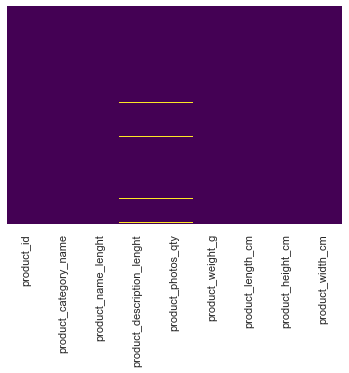

In [528]:
products['product_name_lenght'].fillna(value=products['product_name_lenght'].median, inplace=True) # float
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")
print("Nans Anzahl in product_name_lenght = %s " % products['product_name_lenght'].isna().sum().sum())

Nans Anzahl in product_name_lenght = 0 


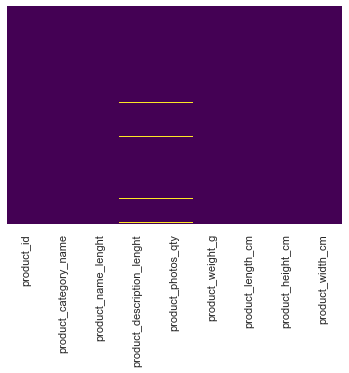

In [529]:
products['product_name_lenght'].fillna(value=products['product_name_lenght'].median, inplace=True) # float
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")
print("Nans Anzahl in product_name_lenght = %s " % products['product_name_lenght'].isna().sum().sum())

Nans Anzahl in product_description_lenght = 0 


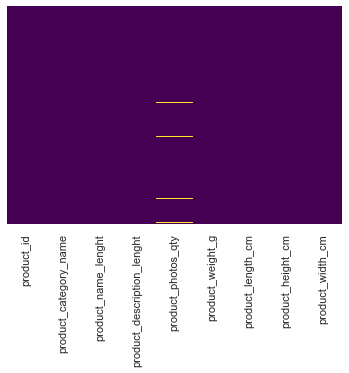

In [530]:
products['product_description_lenght'].fillna(value=products['product_description_lenght'].median, inplace=True) # float
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")
print("Nans Anzahl in product_description_lenght = %s " % products['product_description_lenght'].isna().sum().sum())

Nans Anzahl in product_description_lenght = 0 


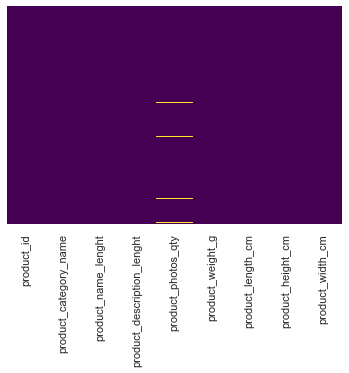

In [531]:
products['product_description_lenght'].fillna(value=products['product_description_lenght'].median, inplace=True) # float
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")
print("Nans Anzahl in product_description_lenght = %s " % products['product_description_lenght'].isna().sum().sum())

Nans Anzahl in product_photos_qty = 0 


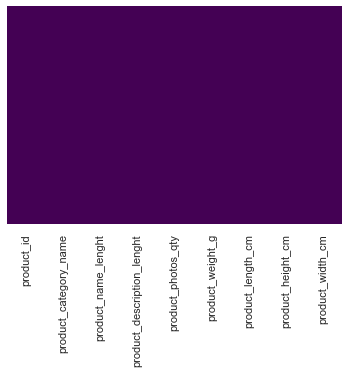

In [532]:
products['product_photos_qty'].fillna(value=products['product_photos_qty'].median, inplace=True) # float
sns.heatmap(products.isnull(),yticklabels=False,cbar=False,cmap="viridis")
print("Nans Anzahl in product_photos_qty = %s " % products['product_photos_qty'].isna().sum().sum())

In [533]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [534]:
products['product_weight_g'].fillna(value=products['product_weight_g'].mean(), inplace=True) # float
products['product_length_cm'].fillna(value=products['product_length_cm'].mean(), inplace=True) # float
products['product_height_cm'].fillna(value=products['product_height_cm'].mean(), inplace=True) # float
products['product_width_cm'].fillna(value=products['product_width_cm'].mean(), inplace=True) # float

products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [535]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  object 
 3   product_description_lenght  32951 non-null  object 
 4   product_photos_qty          32951 non-null  object 
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.3+ MB


### Fill order Reviews NaNs

<AxesSubplot:>

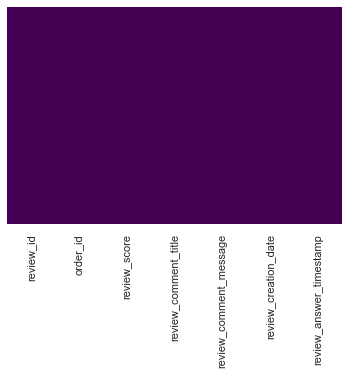

In [536]:
order_reviews['review_comment_title'].fillna(0, inplace=True)
order_reviews['review_comment_message'].fillna(0, inplace=True)
sns.heatmap(order_reviews.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [537]:
orders.isna().sum()

order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                     160
order_delivered_carrier_date         1783
order_delivered_customer_date        2965
order_estimated_delivery_date           0
days_order_to_delivery               2965
days_order_to_estimates_delivery        0
time_to_approve_order                 160
minutes_to_approve_order              160
difference_estimated_to_real         2965
prediction_accuracy                  2965
group_estimated_difference          92986
group_estimated_dilivery              938
month_of_purchase                       0
dtype: int64

In [538]:
orders['group_estimated_difference'].fillna(value=orders['group_estimated_difference'].mode()[0], inplace=True) # Object

In [539]:
orders['group_estimated_difference'].isna().sum()

0

In [540]:
# Isolieren der Nullwerte 
missing_delivered_dates = orders[orders['order_delivered_customer_date'].isna()]
delivered_dates = orders[~orders['order_delivered_customer_date'].isna()] 

missing_delivered_dates.isna().sum()

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                    146
order_delivered_carrier_date        1782
order_delivered_customer_date       2965
order_estimated_delivery_date          0
days_order_to_delivery              2965
days_order_to_estimates_delivery       0
time_to_approve_order                146
minutes_to_approve_order             146
difference_estimated_to_real        2965
prediction_accuracy                 2965
group_estimated_difference             0
group_estimated_dilivery              69
month_of_purchase                      0
dtype: int64

In [541]:
# die ersten fünf Zeilen des Datensatzes mit den Nullstellen
missing_delivered_dates.head() 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaT,2017-05-09,NaN,27,2 days 01:03:09,2943.0,NaN,NaN,-1.0,27.0,4
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,NaN,23,0 days 11:46:30,706.0,NaN,NaN,-1.0,23.0,6
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaT,2018-08-21,NaN,17,3 days 12:30:32,5070.0,NaN,NaN,-1.0,17.0,8
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03,NaN,29,0 days 00:08:06,8.0,NaN,NaN,-1.0,29.0,9
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,27,0 days 14:59:23,899.0,NaN,NaN,-1.0,27.0,1


In [542]:
# Untersuchung des Order Status
orders_processing = orders[orders['order_status']=='processing']
orders_processing.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaT,2017-10-03,NaN,29,0 days 00:08:06,8.0,NaN,NaN,-1.0,29.0,9
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaT,2016-12-09,NaN,64,0 days 17:06:52,1026.0,NaN,NaN,-1.0,NaN,10
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaT,2017-12-20,NaN,25,0 days 03:05:42,185.0,NaN,NaN,-1.0,25.0,11
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaT,2017-12-12,NaN,24,0 days 19:41:04,1181.0,NaN,NaN,-1.0,24.0,11
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaT,2017-04-04,NaN,49,0 days 00:11:00,11.0,NaN,NaN,-1.0,49.0,2


In [543]:
# Nullstellen in dem Datensatz, wo vorbereitete Bestellungen 
orders_processing.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date        301
order_delivered_customer_date       301
order_estimated_delivery_date         0
days_order_to_delivery              301
days_order_to_estimates_delivery      0
time_to_approve_order                 0
minutes_to_approve_order              0
difference_estimated_to_real        301
prediction_accuracy                 301
group_estimated_difference            0
group_estimated_dilivery             10
month_of_purchase                     0
dtype: int64

[Text(0, 0, 'delivered'),
 Text(1, 0, 'invoiced'),
 Text(2, 0, 'shipped'),
 Text(3, 0, 'processing'),
 Text(4, 0, 'unavailable'),
 Text(5, 0, 'canceled'),
 Text(6, 0, 'created'),
 Text(7, 0, 'approved')]

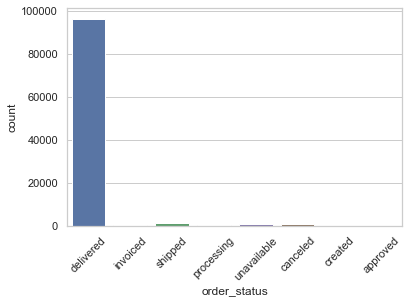

In [544]:
# Plot Order Status
processing_order = sns.countplot(data= orders, x='order_status') 
processing_order.set_xticklabels(processing_order.get_xticklabels(), rotation=45)

- Ziel: Ankunftszeit vorhersagen
- das können wir nur mit *delivered items* am besten, da bei den weiteren columns noch keine Zeiten gegeben sind

In [545]:
# Number of operations in order status
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [546]:
# Record of delivered orders
delivered_orders = orders[orders['order_status'] == 'delivered']
delivered_orders.shape

(96478, 17)

In [547]:
# missing values 
delivered_orders.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
days_order_to_delivery                8
days_order_to_estimates_delivery      0
time_to_approve_order                14
minutes_to_approve_order             14
difference_estimated_to_real          8
prediction_accuracy                   8
group_estimated_difference            0
group_estimated_dilivery            864
month_of_purchase                     0
dtype: int64

In [548]:
# die ersten fünf Zeilen des DF 
delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0 days 00:10:42,10.0,7.0,before,-1.0,15.0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1 days 06:42:50,1842.0,6.0,before,-1.0,19.0,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0 days 00:16:34,16.0,17.0,before,-1.0,26.0,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0 days 00:17:53,17.0,13.0,before,-1.0,26.0,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0 days 01:01:50,61.0,10.0,before,-1.0,12.0,2


In [549]:
#Isolieren der Nullstellen 
missing_delivered_orders = delivered_orders[delivered_orders['order_approved_at'].isna()]
delivered_dates = delivered_orders[~delivered_orders['order_approved_at'].isna()] 

missing_delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,10.0,26,NaT,NaN,16.0,before,-1.0,26.0,2
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,11.0,30,NaT,NaN,19.0,before,-1.0,30.0,2
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,10.0,26,NaT,NaN,16.0,before,-1.0,26.0,2
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,18.0,40,NaT,NaN,22.0,before,-1.0,40.0,2
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,12.0,30,NaT,NaN,18.0,before,-1.0,30.0,2
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,11.0,40,NaT,NaN,29.0,before,-1.0,40.0,1
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,11.0,35,NaT,NaN,24.0,before,-1.0,35.0,2
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,12.0,31,NaT,NaN,19.0,before,-1.0,31.0,2
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,17.0,55,NaT,NaN,38.0,before,-1.0,NaN,1
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,13.0,30,NaT,NaN,17.0,before,-1.0,30.0,2


In [550]:
# füllen des genehmigten Bestellungsdatums
delivered_orders['order_approved_at'].fillna(delivered_orders['order_purchase_timestamp'])

0       2017-10-02 11:07:15
1       2018-07-26 03:24:27
2       2018-08-08 08:55:23
3       2017-11-18 19:45:59
4       2018-02-13 22:20:29
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 13:10:37
99438   2017-08-27 15:04:16
99439   2018-01-08 21:36:21
99440   2018-03-09 11:20:28
Name: order_approved_at, Length: 96478, dtype: datetime64[ns]

In [551]:
# Check 
delivered_orders.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
days_order_to_delivery                8
days_order_to_estimates_delivery      0
time_to_approve_order                14
minutes_to_approve_order             14
difference_estimated_to_real          8
prediction_accuracy                   8
group_estimated_difference            0
group_estimated_dilivery            864
month_of_purchase                     0
dtype: int64

In [552]:
#Isolieren der Nullstellen 
missing_carrier_orders = delivered_orders[delivered_orders['order_delivered_carrier_date'].isna()]
carrier_dates = delivered_orders[~delivered_orders['order_delivered_carrier_date'].isna()] 

missing_carrier_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14,52.0,45,0 days 00:14:18,14.0,-7.0,after,-7.0,45.0,9
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaT,2017-06-23,NaN,28,0 days 00:07:33,7.0,NaN,NaN,-1.0,28.0,5


In [553]:
delivered_orders.shape

(96478, 17)

In [554]:
#Isolieren der Nullstellen 
missing_delivered_date_orders = delivered_orders[delivered_orders['order_delivered_customer_date'].isna()]
missing_delivered_date_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,NaN,19,0 days 00:12:33,12.0,NaN,NaN,-1.0,19.0,11
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,NaN,25,0 days 00:20:22,20.0,NaN,NaN,-1.0,25.0,6
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,NaN,28,0 days 00:10:01,10.0,NaN,NaN,-1.0,28.0,7
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,NaN,28,0 days 00:09:19,9.0,NaN,NaN,-1.0,28.0,7
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24,NaN,22,0 days 00:15:52,15.0,NaN,NaN,-1.0,22.0,7
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaT,2017-06-23,NaN,28,0 days 00:07:33,7.0,NaN,NaN,-1.0,28.0,5
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,NaN,17,0 days 00:27:00,27.0,NaN,NaN,-1.0,17.0,6
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,NaN,21,0 days 00:20:18,20.0,NaN,NaN,-1.0,21.0,6


In [555]:
delivered_orders.dropna(subset=['order_delivered_customer_date', 'order_delivered_carrier_date']) 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0 days 00:10:42,10.0,7.0,before,-1.0,15.0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1 days 06:42:50,1842.0,6.0,before,-1.0,19.0,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0 days 00:16:34,16.0,17.0,before,-1.0,26.0,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0 days 00:17:53,17.0,13.0,before,-1.0,26.0,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0 days 01:01:50,61.0,10.0,before,-1.0,12.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,18,0 days 00:00:00,0.0,10.0,before,-1.0,18.0,3
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,23,0 days 00:11:39,11.0,1.0,before,-1.0,23.0,2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0,30,0 days 00:17:33,17.0,6.0,before,-1.0,30.0,8
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,37,0 days 00:07:54,7.0,20.0,before,-1.0,37.0,1


In [556]:
delivered_orders.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
days_order_to_delivery                8
days_order_to_estimates_delivery      0
time_to_approve_order                14
minutes_to_approve_order             14
difference_estimated_to_real          8
prediction_accuracy                   8
group_estimated_difference            0
group_estimated_dilivery            864
month_of_purchase                     0
dtype: int64

In [557]:
delivered_orders.shape

(96478, 17)

### Nullstellen füllen (I)

In [558]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   order_id                          99441 non-null  object         
 1   customer_id                       99441 non-null  object         
 2   order_status                      99441 non-null  object         
 3   order_purchase_timestamp          99441 non-null  datetime64[ns] 
 4   order_approved_at                 99281 non-null  datetime64[ns] 
 5   order_delivered_carrier_date      97658 non-null  object         
 6   order_delivered_customer_date     96476 non-null  datetime64[ns] 
 7   order_estimated_delivery_date     99441 non-null  datetime64[ns] 
 8   days_order_to_delivery            96476 non-null  float64        
 9   days_order_to_estimates_delivery  99441 non-null  int64          
 10  time_to_approve_order             

In [559]:
orders.isna().sum()

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                    160
order_delivered_carrier_date        1783
order_delivered_customer_date       2965
order_estimated_delivery_date          0
days_order_to_delivery              2965
days_order_to_estimates_delivery       0
time_to_approve_order                160
minutes_to_approve_order             160
difference_estimated_to_real        2965
prediction_accuracy                 2965
group_estimated_difference             0
group_estimated_dilivery             938
month_of_purchase                      0
dtype: int64

In [560]:
orders.isna().sum()

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                    160
order_delivered_carrier_date        1783
order_delivered_customer_date       2965
order_estimated_delivery_date          0
days_order_to_delivery              2965
days_order_to_estimates_delivery       0
time_to_approve_order                160
minutes_to_approve_order             160
difference_estimated_to_real        2965
prediction_accuracy                 2965
group_estimated_difference             0
group_estimated_dilivery             938
month_of_purchase                      0
dtype: int64

In [561]:
orders.dropna(subset=["group_estimated_dilivery"], axis= 0, inplace= True)
orders.isna().sum()

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                    159
order_delivered_carrier_date        1732
order_delivered_customer_date       2896
order_estimated_delivery_date          0
days_order_to_delivery              2896
days_order_to_estimates_delivery       0
time_to_approve_order                159
minutes_to_approve_order             159
difference_estimated_to_real        2896
prediction_accuracy                 2896
group_estimated_difference             0
group_estimated_dilivery               0
month_of_purchase                      0
dtype: int64

In [562]:
orders.dropna(subset=["time_to_approve_order"], axis= 0, inplace= True)
orders.isna().sum()

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                      0
order_delivered_carrier_date        1586
order_delivered_customer_date       2750
order_estimated_delivery_date          0
days_order_to_delivery              2750
days_order_to_estimates_delivery       0
time_to_approve_order                  0
minutes_to_approve_order               0
difference_estimated_to_real        2750
prediction_accuracy                 2750
group_estimated_difference             0
group_estimated_dilivery               0
month_of_purchase                      0
dtype: int64

## 2.2 Feature Engineerung

### Analyse der Lieferung (I)

- Differnz zwischen Bestellkauf bis Lieferung = ['days_order_to_deliver']
- Differenz zwischen Bestellkauf und geschätzten Lieferung = ['days_order_to_estimates_delivery']
- Zeit bis die Bestellung approved wurde ['time_to_approve_order']
- Unterschied zwischen tatsächliche Lieferung und geschätzten Lieferung

In [563]:
### Convert str to timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

orders['days_order_to_delivery'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['days_order_to_estimates_delivery'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days
orders['time_to_approve_order'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.days

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0,10.0,7.0,before,-1.0,15.0,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1,1842.0,6.0,before,-1.0,19.0,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0,16.0,17.0,before,-1.0,26.0,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0,17.0,13.0,before,-1.0,26.0,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0,61.0,10.0,before,-1.0,12.0,2


- days_order_to_estimates_delivery (um später zu vergleichen)

<AxesSubplot:xlabel='days_order_to_delivery', ylabel='count'>

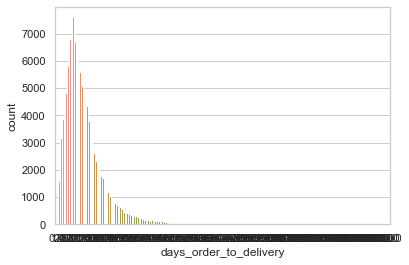

In [564]:
sns.countplot(data=orders , x='days_order_to_delivery')

<AxesSubplot:xlabel='days_order_to_estimates_delivery', ylabel='count'>

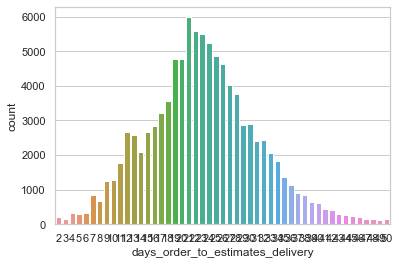

In [565]:
sns.countplot(data=orders , x='days_order_to_estimates_delivery')

In [566]:
# Unterschied geschätzte Lieferung und tatsächliche Lieferung
orders['differantial_order_estimated_order']= orders['days_order_to_estimates_delivery'] - orders['days_order_to_delivery']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_order_to_delivery,days_order_to_estimates_delivery,time_to_approve_order,minutes_to_approve_order,difference_estimated_to_real,prediction_accuracy,group_estimated_difference,group_estimated_dilivery,month_of_purchase,differantial_order_estimated_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,15,0,10.0,7.0,before,-1.0,15.0,10,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,19,1,1842.0,6.0,before,-1.0,19.0,7,6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,26,0,16.0,17.0,before,-1.0,26.0,8,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26,0,17.0,13.0,before,-1.0,26.0,11,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,12,0,61.0,10.0,before,-1.0,12.0,2,10.0


In [567]:
orders['days_order_to_delivery'].median() 

10.0

### Create Col volume

In [568]:
products["volume_cm3"]=products['product_length_cm']*products['product_height_cm']*products['product_width_cm']
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


### Time between order and picking

In [569]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
orders['time_to_picking'] = (order_items['shipping_limit_date'] - orders['order_approved_at']).dt.days

In [570]:
orders['time_to_picking'].describe()

count    98344.000000
mean         5.222606
std        215.509494
min       -694.000000
25%       -142.000000
50%          6.000000
75%        155.000000
max       1015.000000
Name: time_to_picking, dtype: float64

### month of purchase

In [571]:
orders['month_of_purchase']=pd.DatetimeIndex(orders['order_purchase_timestamp']).month

In [572]:
orders['month_of_purchase'].isna().sum()

0

### day of the week of purchase

In [573]:
orders['day_of_purchase']=pd.DatetimeIndex(orders['order_purchase_timestamp']).dayofweek

In [574]:
orders['day_of_purchase'].isna().sum()

0

###  Merge all table

In [575]:
order_items_products = pd.merge(order_items,products,on='product_id')
order_items_products_sellers = pd.merge(order_items_products,sellers,on='seller_id')
two_order_items_products_sellers = pd.merge(order_items_products_sellers,orders,on='order_id')
two_order_items_products_sellers_customer = pd.merge(two_order_items_products_sellers,customer,on='customer_id')
two_order_items_products_sellers_customer_reviews = pd.merge(two_order_items_products_sellers_customer,order_reviews,on='order_id')
final_dataframe = pd.merge(two_order_items_products_sellers_customer_reviews,order_payments,on='order_id')

<AxesSubplot:>

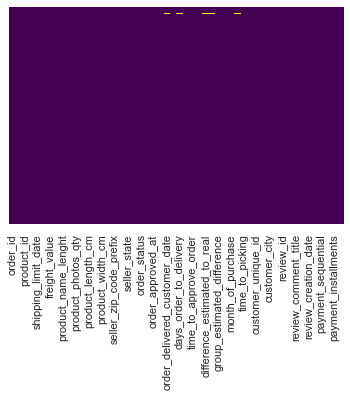

In [576]:
sns.heatmap(final_dataframe.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [577]:
# deskriptive Statistik des finalen Datas 
final_dataframe.describe()

,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,seller_zip_code_prefix,days_order_to_delivery,...,group_estimated_dilivery,month_of_purchase,differantial_order_estimated_order,time_to_picking,day_of_purchase,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value
count,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,113711.000000,...,116110.000000,116110.000000,113711.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000,116110.000000
mean,1.193050,120.165959,19.945391,2096.492011,30.209933,16.568157,23.038403,15265.080922,24426.646628,11.889175,...,23.133279,6.029162,11.232766,5.997632,2.744320,34966.705159,4.034373,1.093644,2.933287,171.342041
std,0.682926,182.293276,15.728046,3762.450511,16.149662,13.405687,11.717515,23406.934613,27581.110729,9.262665,...,8.092402,3.224283,9.681162,215.109968,1.961507,29850.286927,1.386003,0.727496,2.770508,264.495240
min,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,168.000000,1001.000000,0.000000,...,2.000000,1.000000,-189.000000,-694.000000,0.000000,1003.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.050000,300.000000,18.000000,8.000000,15.000000,2856.000000,6429.000000,6.000000,...,18.000000,3.000000,7.000000,-141.000000,1.000000,11075.000000,4.000000,1.000000,1.000000,60.460000
50%,1.000000,74.900000,16.250000,700.000000,25.000000,13.000000,20.000000,6552.000000,13587.500000,10.000000,...,23.000000,6.000000,12.000000,7.000000,3.000000,24230.000000,5.000000,1.000000,2.000000,107.800000
75%,1.000000,133.162500,21.150000,1800.000000,38.000000,20.000000,30.000000,18375.000000,27321.000000,15.000000,...,28.000000,8.000000,16.000000,155.000000,4.000000,58323.000000,5.000000,1.000000,4.000000,188.450000
max,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,296208.000000,99730.000000,208.000000,...,50.000000,12.000000,47.000000,1015.000000,6.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000


In [578]:
final_dataframe.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'volume_cm3', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'days_order_to_delivery', 'days_order_to_estimates_delivery',
       'time_to_approve_order', 'minutes_to_approve_order',
       'difference_estimated_to_real', 'prediction_accuracy',
       'group_estimated_difference', 'group_estimated_dilivery',
       'month_of_purchase', 'differantial_order_estimated_order',
       'time_to_picking', 'day_of_purchase', 'customer_unique_id',
       'cust

In [579]:
final_dataframe['order_year'] = final_dataframe['order_delivered_customer_date'].dt.year
final_dataframe['order_month'] = final_dataframe['order_delivered_customer_date'].dt.month


In [580]:
umsatz_df = final_dataframe[['order_item_id','payment_value', 'order_year', 'order_month']]

In [581]:
### Bestimmung Absatzzahlen 2017
umsatz_2017 = umsatz_df.loc[lambda umsatz_df: umsatz_df['order_year']== 2017]


In [582]:
umsatz_2017_df = umsatz_2017.groupby('order_month').agg({'payment_value': 'sum'})
umsatz_2017

,order_item_id,payment_value,order_year,order_month
0,1,72.19,2017.0,9.0
1,1,73.86,2017.0,7.0
3,1,75.07,2017.0,8.0
4,1,72.19,2017.0,8.0
5,1,82.83,2017.0,8.0
...,...,...,...,...
116094,1,8.25,2017.0,3.0
116095,1,47.71,2017.0,3.0
116102,1,61.74,2017.0,9.0
116106,1,136.04,2017.0,5.0


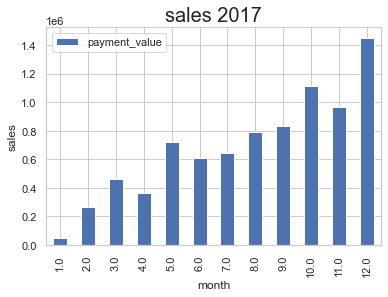

In [583]:
# sales 2017
umsatz_2017_df.plot(kind = 'bar', ylabel='payment_value')

plt.title('sales 2017', fontsize=20)
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

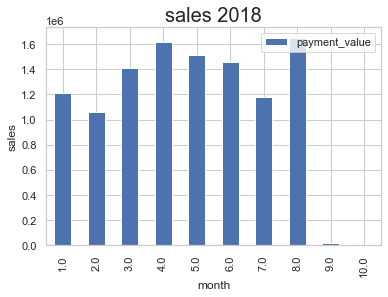

In [584]:
### sales 2018
umsatz_2018 = umsatz_df.loc[lambda umsatz_df: umsatz_df['order_year']== 2018]
umsatz_2018_df = umsatz_2018.groupby('order_month').agg({'payment_value': 'sum'})
umsatz_2018_df.plot(kind = 'bar', ylabel='payment_value')

plt.title('sales 2018', fontsize=20)
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

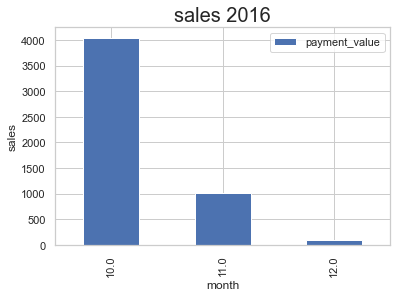

In [585]:
### sales 2019
umsatz_2016 = umsatz_df.loc[lambda umsatz_df: umsatz_df['order_year']== 2016]
umsatz_2016_df = umsatz_2016.groupby('order_month').agg({'payment_value': 'sum'})
umsatz_2016_df.plot(kind = 'bar', ylabel='payment_value')

plt.title('sales 2016', fontsize=20)
plt.xlabel('month')
plt.ylabel('sales')
plt.show()